# Data Preprocessing

Steps for Data Preprocessing is:
<li> Loading Dataset
<li> Understanding Features and Labels
<li> Information and Descriptives of Dataset
<li> Visualize Data

## 1. Loading Dataset

Dataset generated synthetically, reachable from Github. Url is used to import Datasets.

In [ ]:
import pandas as pd #read dataset files
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import numpy as np # matrix operations

In [ ]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dictionary with dataset names and their raw GitHub URLs
datasets = {
    "TrainSet": "https://raw.githubusercontent.com/sabisay/AnomalyDetectionOnLogDatas/refs/heads/main/GeneratingSyntheticLogDatas/SecondTry/First/Train.csv",
    "CVSet": "https://raw.githubusercontent.com/sabisay/AnomalyDetectionOnLogDatas/refs/heads/main/GeneratingSyntheticLogDatas/SecondTry/CV/CV.csv",
    "TestSet": "https://raw.githubusercontent.com/sabisay/AnomalyDetectionOnLogDatas/refs/heads/main/GeneratingSyntheticLogDatas/SecondTry/Test/Test.csv",
}

# Load datasets seperately
df_train = pd.read_csv(datasets["TrainSet"])
df_cv = pd.read_csv(datasets["CVSet"])
df_test = pd.read_csv(datasets["TestSet"])

## 2. Understanding Features and Labels

Columns, Shapes and Types of Datasets:

In [ ]:
print(df_train.columns)
print(df_cv.columns)
print(df_test.columns)

Index(['ID', 'UserID', 'Department', 'UserRole', 'Connection', 'Timestamp',
       'AccessLevel', 'AccessDuration', 'DeviceID', 'PatientID',
       'IsAccessFail', 'IsSensitive', 'VisitDepartment'],
      dtype='object')
Index(['ID', 'UserID', 'Department', 'UserRole', 'Connection', 'Timestamp',
       'AccessLevel', 'AccessDuration', 'DeviceID', 'PatientID',
       'IsAccessFail', 'IsSensitive', 'VisitDepartment'],
      dtype='object')
Index(['ID', 'UserID', 'Department', 'UserRole', 'Connection', 'Timestamp',
       'AccessLevel', 'AccessDuration', 'DeviceID', 'PatientID',
       'IsAccessFail', 'IsSensitive', 'VisitDepartment'],
      dtype='object')


Also, For Analyzing the Efficiency of our Model We Created Labeled Versions of Datasets. Let us Import them and see how anomalies seperated into datasets:

In [ ]:
# Dictionary with dataset names and their raw GitHub URLs
datasets = {
    "LabeledTest": "https://raw.githubusercontent.com/sabisay/AnomalyDetectionOnLogDatas/refs/heads/main/GeneratingSyntheticLogDatas/SecondTry/Test/Test_Labeled.csv",
    "LabeledCV": "https://raw.githubusercontent.com/sabisay/AnomalyDetectionOnLogDatas/refs/heads/main/GeneratingSyntheticLogDatas/SecondTry/CV/CV_Labeled.csv",
}

# Load datasets seperately
df_labeled_test = pd.read_csv(datasets["LabeledTest"])
df_labeled_cv = pd.read_csv(datasets["LabeledCV"])


shapes of datasets and the type of last dataset shown, others are not shown because they have same types of data:

In [ ]:
print("shape of train: ", df_train.shape)
print("shape of cv: ", df_cv.shape)
print("shape of test: ", df_test.shape)
print("shape of labeled train: ", df_labeled_test.shape)
print("shape of labeled cv: ", df_labeled_cv.shape, df_train.dtypes)

shape of train:  (60000, 13)
shape of cv:  (20000, 13)
shape of test:  (20000, 13)
shape of labeled train:  (20000, 14)
shape of labeled cv:  (20000, 14) ID                  int64
UserID             object
Department         object
UserRole           object
Connection         object
Timestamp          object
AccessLevel        object
AccessDuration      int64
DeviceID           object
PatientID          object
IsAccessFail        int64
IsSensitive         int64
VisitDepartment    object
dtype: object


## 3. Information and Descriptives of Dataset

### 3.1 Descriptives:

In [ ]:
df_train.describe(include='all')

,ID,UserID,Department,UserRole,Connection,Timestamp,AccessLevel,AccessDuration,DeviceID,PatientID,IsAccessFail,IsSensitive,VisitDepartment
count,60000.000000,60000,60000,60000,60000,60000,60000,60000.000000,60000,60000,60000.000000,60000.000000,60000
unique,NaN,200,12,5,2,52316,4,NaN,200,18998,NaN,NaN,10
top,NaN,USR_018,DPT_5,Nurse,OnSite,2024-01-01 15:26:25,read,NaN,DVC_135,PTN_09482,NaN,NaN,DPT_003
freq,NaN,358,6024,23929,58197,5,41818,NaN,361,14,NaN,NaN,6281
mean,49956.198217,NaN,NaN,NaN,NaN,NaN,NaN,209.708050,NaN,NaN,0.019583,0.089650,NaN
std,28930.859010,NaN,NaN,NaN,NaN,NaN,NaN,51.828734,NaN,NaN,0.138565,0.285682,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,120.000000,NaN,NaN,0.000000,0.000000,NaN
25%,24836.500000,NaN,NaN,NaN,NaN,NaN,NaN,165.000000,NaN,NaN,0.000000,0.000000,NaN
50%,50000.000000,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,NaN,NaN,0.000000,0.000000,NaN
75%,75044.750000,NaN,NaN,NaN,NaN,NaN,NaN,255.000000,NaN,NaN,0.000000,0.000000,NaN


In [ ]:
df_cv.describe(include='all')

,ID,UserID,Department,UserRole,Connection,Timestamp,AccessLevel,AccessDuration,DeviceID,PatientID,IsAccessFail,IsSensitive,VisitDepartment
count,20000.000000,20000,20000,20000,20000,20000,20000,20000.000000,20000,20000,20000.000000,20000.000000,20000
unique,NaN,200,12,5,2,18905,4,NaN,200,12657,NaN,NaN,10
top,NaN,USR_050,DPT_8,Nurse,OnSite,2024-01-01 17:31:33,read,NaN,DVC_121,PTN_01624,NaN,NaN,DPT_002
freq,NaN,125,2011,7998,19792,123,14011,NaN,128,124,NaN,NaN,2090
mean,49896.565950,NaN,NaN,NaN,NaN,NaN,NaN,212.211350,NaN,NaN,0.020000,0.088800,NaN
std,28813.041034,NaN,NaN,NaN,NaN,NaN,NaN,139.651682,NaN,NaN,0.140004,0.284462,NaN
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,0.000000,0.000000,NaN
25%,24911.750000,NaN,NaN,NaN,NaN,NaN,NaN,164.000000,NaN,NaN,0.000000,0.000000,NaN
50%,49809.000000,NaN,NaN,NaN,NaN,NaN,NaN,208.000000,NaN,NaN,0.000000,0.000000,NaN
75%,74880.500000,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,NaN,NaN,0.000000,0.000000,NaN


In [ ]:
df_test.describe(include='all')

,ID,UserID,Department,UserRole,Connection,Timestamp,AccessLevel,AccessDuration,DeviceID,PatientID,IsAccessFail,IsSensitive,VisitDepartment
count,20000.000000,20000,20000,20000,20000,20000,20000,20000.000000,20000,20000,20000.000000,20000.000000,20000
unique,NaN,200,12,5,2,18918,4,NaN,200,12555,NaN,NaN,10
top,NaN,USR_037,DPT_5,Nurse,OnSite,2024-01-03 12:19:48,read,NaN,DVC_179,PTN_03178,NaN,NaN,DPT_002
freq,NaN,126,2035,7960,19800,132,14019,NaN,129,133,NaN,NaN,2122
mean,50237.339400,NaN,NaN,NaN,NaN,NaN,NaN,211.743100,NaN,NaN,0.019050,0.092650,NaN
std,28732.270652,NaN,NaN,NaN,NaN,NaN,NaN,127.185951,NaN,NaN,0.136704,0.289949,NaN
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,0.000000,0.000000,NaN
25%,25573.500000,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,0.000000,0.000000,NaN
50%,50218.000000,NaN,NaN,NaN,NaN,NaN,NaN,209.000000,NaN,NaN,0.000000,0.000000,NaN
75%,74970.000000,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,NaN,NaN,0.000000,0.000000,NaN


In [ ]:
df_labeled_cv.describe(include='all')

,ID,UserID,Department,UserRole,Connection,Timestamp,AccessLevel,AccessDuration,DeviceID,PatientID,IsAccessFail,IsSensitive,VisitDepartment,Label
count,20000.000000,20000,20000,20000,20000,20000,20000,20000.000000,20000,20000,20000.000000,20000.000000,20000,20000.000000
unique,NaN,200,12,5,2,18905,4,NaN,200,12657,NaN,NaN,10,NaN
top,NaN,USR_050,DPT_8,Nurse,OnSite,2024-01-01 17:31:33,read,NaN,DVC_121,PTN_01624,NaN,NaN,DPT_002,NaN
freq,NaN,125,2011,7998,19792,123,14011,NaN,128,124,NaN,NaN,2090,NaN
mean,49896.565950,NaN,NaN,NaN,NaN,NaN,NaN,212.211350,NaN,NaN,0.020000,0.088800,NaN,0.012000
std,28813.041034,NaN,NaN,NaN,NaN,NaN,NaN,139.651682,NaN,NaN,0.140004,0.284462,NaN,0.108888
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,24911.750000,NaN,NaN,NaN,NaN,NaN,NaN,164.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000
50%,49809.000000,NaN,NaN,NaN,NaN,NaN,NaN,208.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000
75%,74880.500000,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000


In [ ]:
df_labeled_test.describe(include='all')

,ID,UserID,Department,UserRole,Connection,Timestamp,AccessLevel,AccessDuration,DeviceID,PatientID,IsAccessFail,IsSensitive,VisitDepartment,Label
count,20000.000000,20000,20000,20000,20000,20000,20000,20000.000000,20000,20000,20000.000000,20000.000000,20000,20000.000000
unique,NaN,200,12,5,2,18918,4,NaN,200,12555,NaN,NaN,10,NaN
top,NaN,USR_037,DPT_5,Nurse,OnSite,2024-01-03 12:19:48,read,NaN,DVC_179,PTN_03178,NaN,NaN,DPT_002,NaN
freq,NaN,126,2035,7960,19800,132,14019,NaN,129,133,NaN,NaN,2122,NaN
mean,50237.339400,NaN,NaN,NaN,NaN,NaN,NaN,211.743100,NaN,NaN,0.019050,0.092650,NaN,0.012050
std,28732.270652,NaN,NaN,NaN,NaN,NaN,NaN,127.185951,NaN,NaN,0.136704,0.289949,NaN,0.109112
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,25573.500000,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000
50%,50218.000000,NaN,NaN,NaN,NaN,NaN,NaN,209.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000
75%,74970.000000,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000


### 3.2 Conclusion of Descriptives, What We Understand From This Data:
we could see that, most of our data is object type. Let us visualize it to understand better:


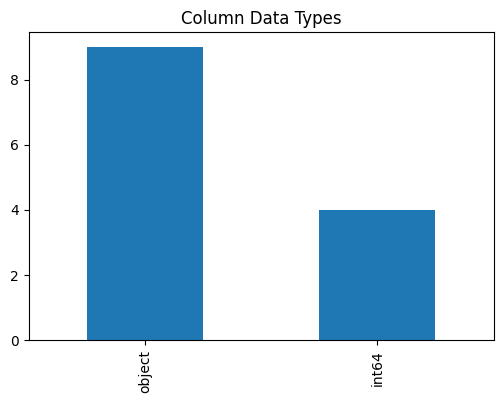

In [ ]:
df_train.dtypes.value_counts().plot(kind='bar', title='Column Data Types', figsize=(6, 4))
plt.show()

In [ ]:
df_train.select_dtypes(include='int64').columns.tolist()

['ID', 'AccessDuration', 'IsAccessFail', 'IsSensitive']

**From this histogram, we could see that most of the our cells in object type. Let us convert them into numeric values to do operations easier. We are going to do some Feature Engineering on data.**

### 3.3 Feature Engineering 1

We have 5 dataset here. It is hard to apply all feature developments seperately to them. so we will concatanate them together, apply feature developments and seperate them again:

In [ ]:
df_train['source'] = 'train'
df_cv['source'] = 'cv'
df_test['source'] = 'test'
df_labeled_test['source'] = 'labeled_test'
df_labeled_cv['source'] = 'labeled_cv'

df_all = pd.concat([df_train, df_cv, df_test, df_labeled_test, df_labeled_cv], ignore_index=True)
print(df_all.head)

<bound method NDFrame.head of             ID   UserID Department    UserRole Connection  \
0        12863  USR_108      DPT_8       Nurse     OnSite   
1        47294  USR_106    DPT_008       Nurse     OnSite   
2         7545  USR_035      DPT_8      Doctor     OnSite   
3         7737  USR_135    DPT_005   Secretary     OnSite   
4        58605  USR_019    DPT_008      Doctor     OnSite   
...        ...      ...        ...         ...        ...   
139995   99978  USR_132    DPT_007   Secretary     OnSite   
139996   99984  USR_183    DPT_003  Researcher     OnSite   
139997   99988  USR_033      DPT_8      Doctor     OnSite   
139998   99994  USR_114    DPT_006       Nurse     OnSite   
139999  100000  USR_146    DPT_005   Secretary     OnSite   

                  Timestamp AccessLevel  AccessDuration DeviceID  PatientID  \
0       2024-01-01 17:47:12        read             146  DVC_120  PTN_16051   
1       2024-01-02 05:03:06        read             266  DVC_024  PTN_00635   


##### 3.3.1 User ID convert to INT64

In [ ]:
df_all['UserID'] = df_all['UserID'].str.extract(r'USR_(\d+)')
df_all['UserID'] = pd.to_numeric(df_all['UserID'], errors='coerce').astype('int64')

In [ ]:
df_all["UserID"].isna().sum()

np.int64(0)

##### 3.3.2 Department convert to INT64

In [ ]:
df_all['Department'] = df_all['Department'].str.extract(r'DPT_(\d+)')
df_all['Department'] = pd.to_numeric(df_all['Department'], errors='coerce').astype('int64')

In [ ]:
df_all["Department"].isna().sum()

np.int64(0)

##### 3.3.3 User Role convert to INT64

In [ ]:
df_all['UserRole'].unique()

array(['Nurse', 'Doctor', 'Secretary', 'Researcher', 'Admin'],
      dtype=object)

In [ ]:
df_all['UserRole'] = df_all['UserRole'].astype('category').cat.codes
df_all["UserRole"].isna().sum()

np.int64(0)

##### 3.3.4 Connection convert to Binary

In [ ]:
df_all['Connection'].unique()

array(['OnSite', 'VPN'], dtype=object)

In [ ]:
df_all['Connection'] = df_all['Connection'].astype('category').cat.codes
df_all["Connection"].isna().sum()

np.int64(0)

##### 3.3.5 Access Level convert to INT64

In [ ]:
df_all['AccessLevel'].unique()

array(['read', 'delete', 'write', 'modify'], dtype=object)

In [ ]:
df_all['AccessLevel'] = df_all['AccessLevel'].astype('category').cat.codes
df_all["AccessLevel"].isna().sum()

np.int64(0)

##### 3.3.6 Device ID convert to INT64

In [ ]:
df_all['DeviceID'] = df_all['DeviceID'].str.extract(r'DVC_(\d+)')
df_all['DeviceID'] = pd.to_numeric(df_all['DeviceID'], errors='coerce').astype('int64')

In [ ]:
df_all["DeviceID"].isna().sum()

np.int64(0)

##### 3.3.7 Patient ID convert to INT64

In [ ]:
df_all['PatientID'] = df_all['PatientID'].str.extract(r'PTN_(\d+)')
df_all['PatientID'] = pd.to_numeric(df_all['PatientID'], errors='coerce').astype('int64')

In [ ]:
df_all["PatientID"].isna().sum()

np.int64(0)

##### 3.3.7 Visited Deparment convert to INT64

In [ ]:
df_all['VisitDepartment'] = df_all['VisitDepartment'].str.extract(r'DPT_(\d+)')
df_all['VisitDepartment'] = pd.to_numeric(df_all['VisitDepartment'], errors='coerce').astype('int64')

In [ ]:
df_all["VisitDepartment"].isna().sum()

np.int64(0)

##### 3.3.8 Seperating Timestamp

In [ ]:
df_all['Timestamp'] = pd.to_datetime(df_all['Timestamp'])

df_all['Year'] = df_all['Timestamp'].dt.year
df_all['Month'] = df_all['Timestamp'].dt.month
df_all['Day'] = df_all['Timestamp'].dt.day
df_all['Hour'] = df_all['Timestamp'].dt.hour
df_all['Minute'] = df_all['Timestamp'].dt.minute
df_all['Second'] = df_all['Timestamp'].dt.second

##### 3.3.9 Seperate them back

Until this point I am not set the timestamp, it will be settled at the main Feature Engineering part.
</br>
Now Let us see the histogram again:

In [ ]:
df_all.select_dtypes(include='object').columns.tolist()

['source']

let us also convert label from float to integer, bcs it just shows if the row is anomaly or not so binary is enoguh.

In [ ]:
df_all.select_dtypes(include='float').columns.tolist()

['Label']

In [ ]:
df_all['Label'] = df_all['Label'].astype('Int64')

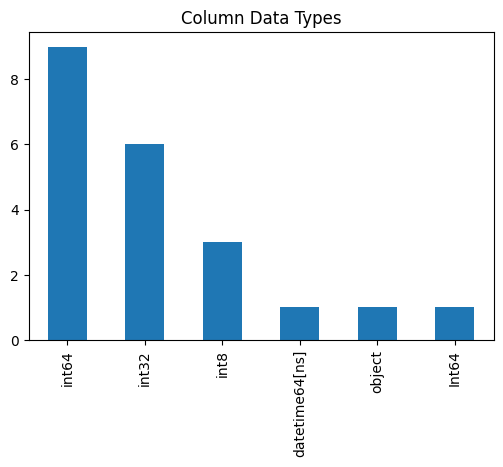

In [ ]:
df_all.dtypes.value_counts().plot(kind='bar', title='Column Data Types', figsize=(6, 4))
plt.show()

In [ ]:
df_all.select_dtypes(include='object').columns.tolist()

['source']

In [ ]:
df_train = df_all[df_all['source'] == 'train'].drop(columns='source')
df_cv    = df_all[df_all['source'] == 'cv'].drop(columns='source')
df_test  = df_all[df_all['source'] == 'test'].drop(columns='source')
df_labeled_test  = df_all[df_all['source'] == 'labeled_test'].drop(columns='source')
df_labeled_cv  = df_all[df_all['source'] == 'labeled_cv'].drop(columns='source')

In [ ]:
df_test.head()

,ID,UserID,Department,UserRole,Connection,Timestamp,AccessLevel,AccessDuration,DeviceID,PatientID,IsAccessFail,IsSensitive,VisitDepartment,Year,Month,Day,Hour,Minute,Second
80000,53264,103,8,2,0,2024-01-02 17:17:25,2,131,185,10741,0,0,9,2024,1,2,17,17,25
80001,30380,63,3,2,0,2024-01-01 21:19:10,2,262,115,4802,0,0,3,2024,1,1,21,19,10
80002,11520,31,6,1,0,2024-01-03 23:23:24,2,149,84,2937,0,0,6,2024,1,3,23,23,24
80003,56433,175,2,3,0,2024-01-02 03:52:24,3,254,92,14510,0,0,2,2024,1,2,3,52,24
80004,54509,62,7,2,0,2024-01-01 06:17:37,1,262,198,8699,0,0,7,2024,1,1,6,17,37


In [ ]:
df_train = df_train.drop(columns='Label')
df_cv = df_cv.drop(columns='Label')
df_test = df_test.drop(columns='Label')

In [ ]:
df_labeled_cv.head()

,ID,UserID,Department,UserRole,Connection,Timestamp,AccessLevel,AccessDuration,DeviceID,PatientID,IsAccessFail,IsSensitive,VisitDepartment,Label,Year,Month,Day,Hour,Minute,Second
120000,7,64,7,2,0,2024-01-01 14:01:37,2,134,131,3094,0,0,7,0,2024,1,1,14,1,37
120001,11,71,4,2,0,2024-01-01 20:55:21,2,249,17,15403,0,0,4,0,2024,1,1,20,55,21
120002,15,103,8,2,0,2024-01-02 16:15:50,3,281,70,2609,0,0,8,0,2024,1,2,16,15,50
120003,17,84,4,2,0,2024-01-03 12:06:06,2,159,161,12339,0,0,4,0,2024,1,3,12,6,6
120004,19,179,5,3,0,2024-01-03 02:29:55,2,160,141,14430,0,0,5,0,2024,1,3,2,29,55


In [ ]:
# 'Label' dışındaki tüm kolonları al
cols = [col for col in df_labeled_cv.columns if col != 'Label']

# 'Label'ı sona ekle
df_labeled_cv = df_labeled_cv[cols + ['Label']]
df_labeled_cv.head()

,ID,UserID,Department,UserRole,Connection,Timestamp,AccessLevel,AccessDuration,DeviceID,PatientID,IsAccessFail,IsSensitive,VisitDepartment,Year,Month,Day,Hour,Minute,Second,Label
120000,7,64,7,2,0,2024-01-01 14:01:37,2,134,131,3094,0,0,7,2024,1,1,14,1,37,0
120001,11,71,4,2,0,2024-01-01 20:55:21,2,249,17,15403,0,0,4,2024,1,1,20,55,21,0
120002,15,103,8,2,0,2024-01-02 16:15:50,3,281,70,2609,0,0,8,2024,1,2,16,15,50,0
120003,17,84,4,2,0,2024-01-03 12:06:06,2,159,161,12339,0,0,4,2024,1,3,12,6,6,0
120004,19,179,5,3,0,2024-01-03 02:29:55,2,160,141,14430,0,0,5,2024,1,3,2,29,55,0


In [ ]:
# 'Label' dışındaki tüm kolonları al
cols = [col for col in df_labeled_test.columns if col != 'Label']

# 'Label'ı sona ekle
df_labeled_test = df_labeled_test[cols + ['Label']]
df_labeled_test.head()

,ID,UserID,Department,UserRole,Connection,Timestamp,AccessLevel,AccessDuration,DeviceID,PatientID,IsAccessFail,IsSensitive,VisitDepartment,Year,Month,Day,Hour,Minute,Second,Label
100000,53264,103,8,2,0,2024-01-02 17:17:25,2,131,185,10741,0,0,9,2024,1,2,17,17,25,0
100001,30380,63,3,2,0,2024-01-01 21:19:10,2,262,115,4802,0,0,3,2024,1,1,21,19,10,0
100002,11520,31,6,1,0,2024-01-03 23:23:24,2,149,84,2937,0,0,6,2024,1,3,23,23,24,0
100003,56433,175,2,3,0,2024-01-02 03:52:24,3,254,92,14510,0,0,2,2024,1,2,3,52,24,0
100004,54509,62,7,2,0,2024-01-01 06:17:37,1,262,198,8699,0,0,7,2024,1,1,6,17,37,0


##### 3.3.9 (Optional) Save new datasets as csv files to use them later

In [ ]:
df_train.to_csv('df_train.csv', index=False)
df_cv.to_csv('df_cv.csv', index=False)
df_test.to_csv('df_test.csv', index=False)
df_labeled_test.to_csv('df_labeled_test.csv', index=False)
df_labeled_cv.to_csv('df_labeled_cv.csv', index=False)

## 4. Visualize Data

We need to analyze our dataset if it is appropriate for our project or not. For this reason we will visualize our data with some python libraries and also PowerBI application is going to be used.

HEATMAPS

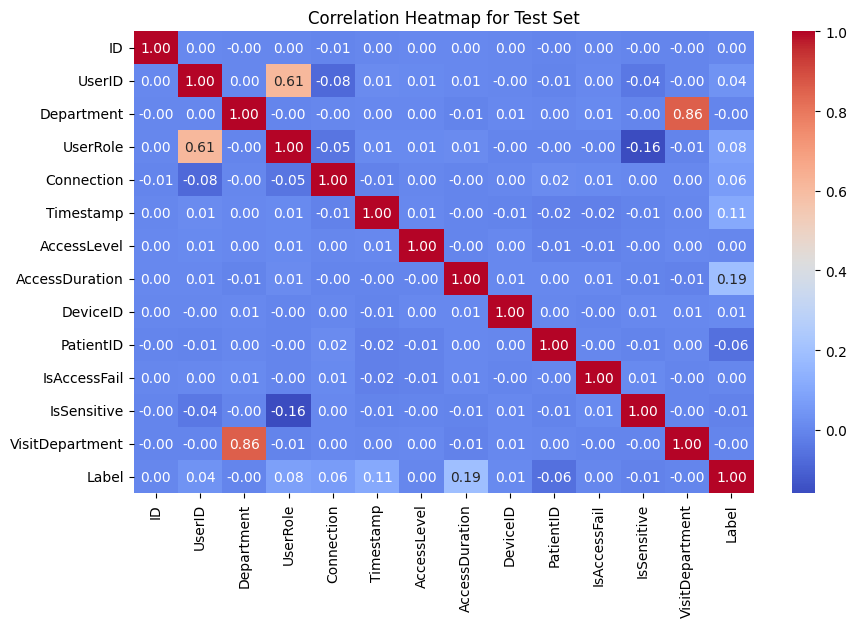

In [ ]:
plt.figure(figsize=(10, 6))
cols_to_exclude = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
df_dropped = df_labeled_test.drop(columns=cols_to_exclude)
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap for Test Set')
plt.show()

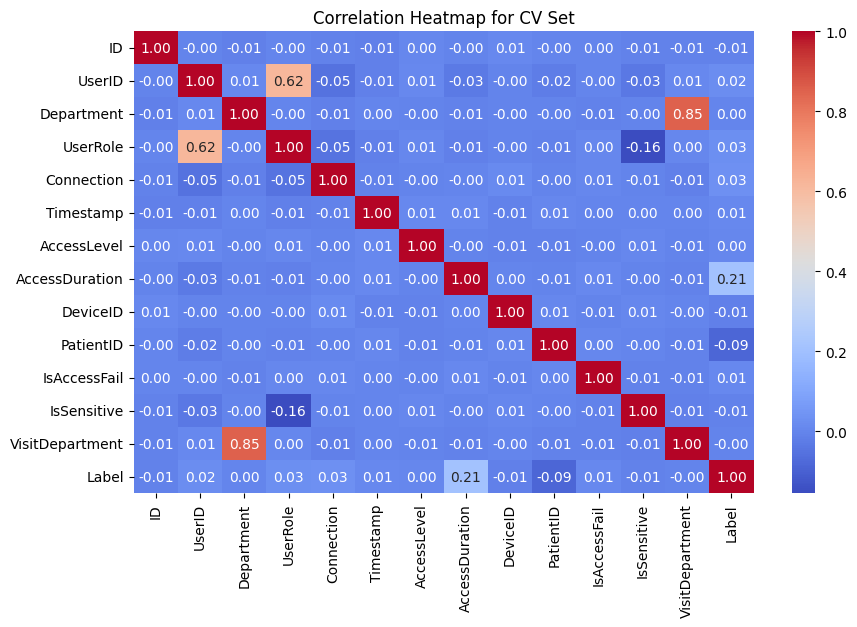

In [ ]:
plt.figure(figsize=(10, 6))
cols_to_exclude = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
df_dropped = df_labeled_cv.drop(columns=cols_to_exclude)
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Heatmap for CV Set')
plt.show()

BOXPLOTS:

In [ ]:
sns.set(style="whitegrid")

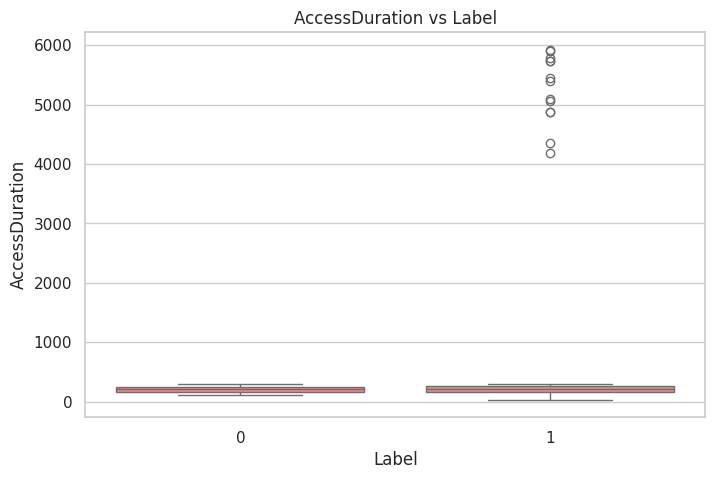

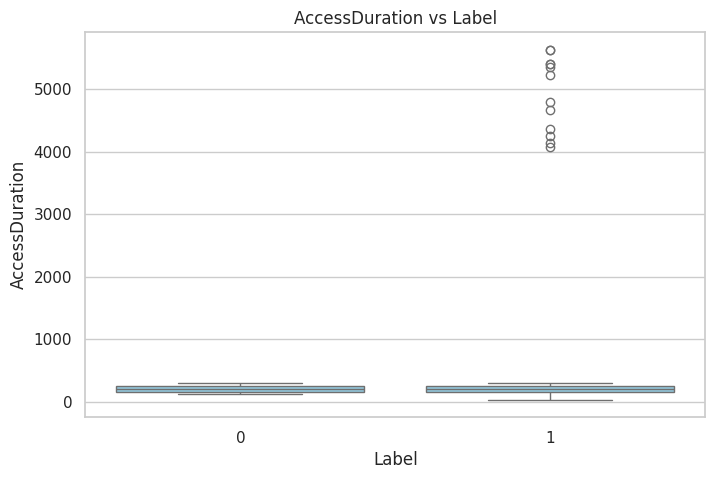

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Label', y='AccessDuration', data=df_labeled_cv, color="salmon")
plt.title('AccessDuration vs Label')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Label', y='AccessDuration', data=df_labeled_test, color="skyblue")
plt.title('AccessDuration vs Label')
plt.show()

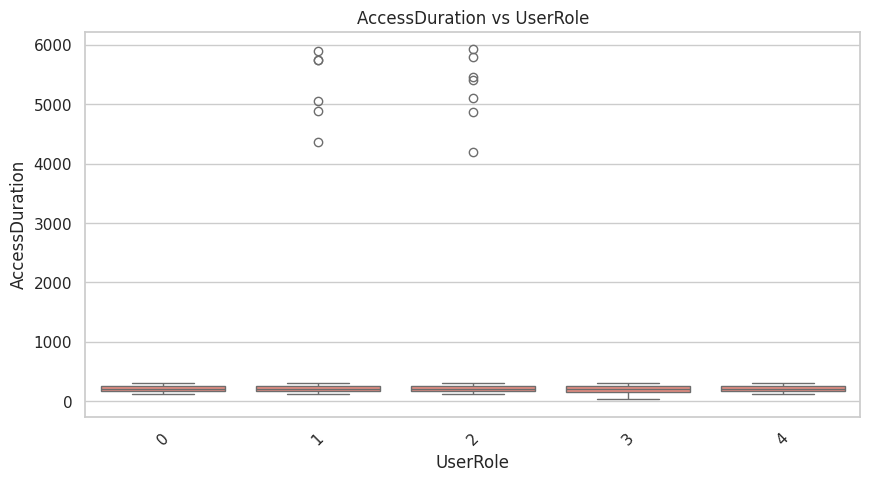

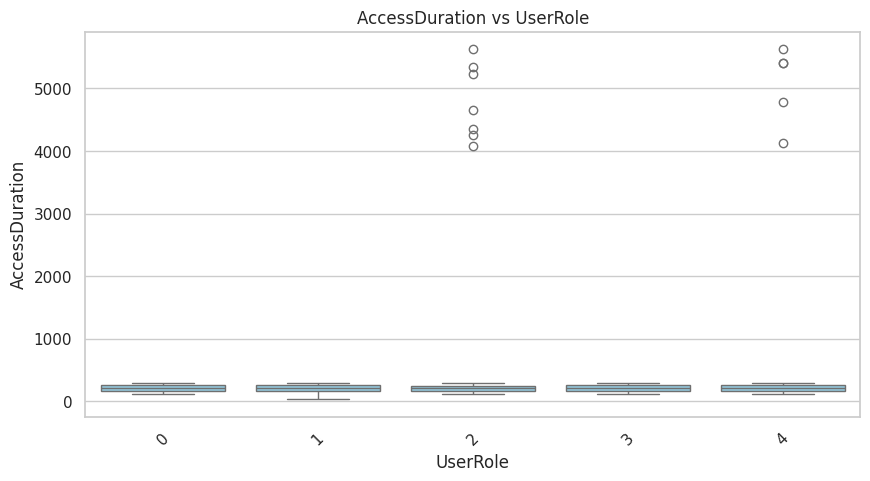

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='UserRole', y='AccessDuration', data=df_labeled_cv, color="salmon")
plt.title('AccessDuration vs UserRole')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='UserRole', y='AccessDuration', data=df_labeled_test, color="skyblue")
plt.title('AccessDuration vs UserRole')
plt.xticks(rotation=45)
plt.show()

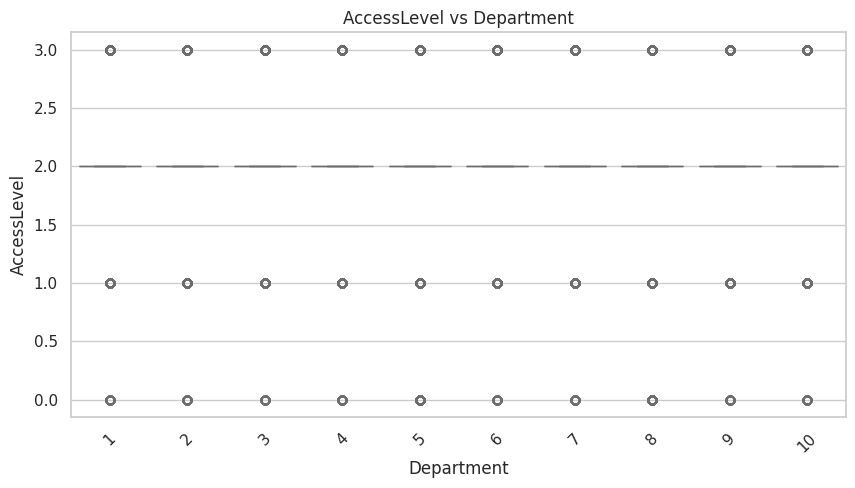

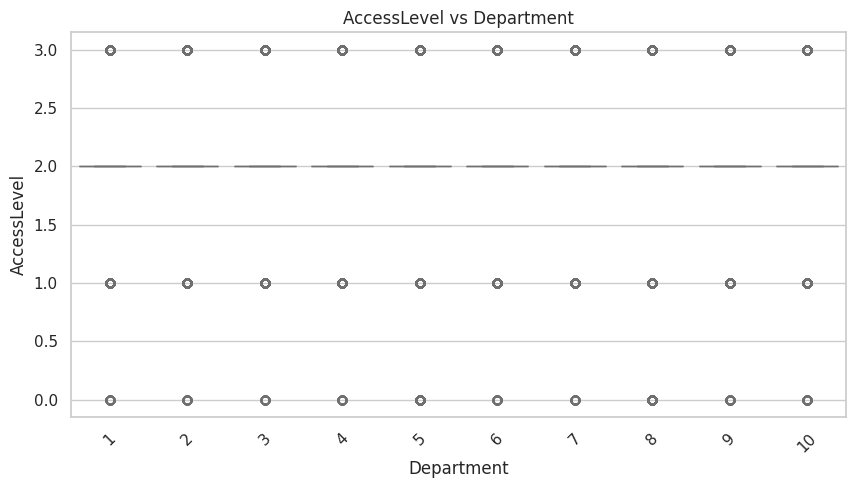

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Department', y='AccessLevel', data=df_labeled_cv, color="salmon")
plt.title('AccessLevel vs Department')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Department', y='AccessLevel', data=df_labeled_test, color="skyblue")
plt.title('AccessLevel vs Department')
plt.xticks(rotation=45)
plt.show()


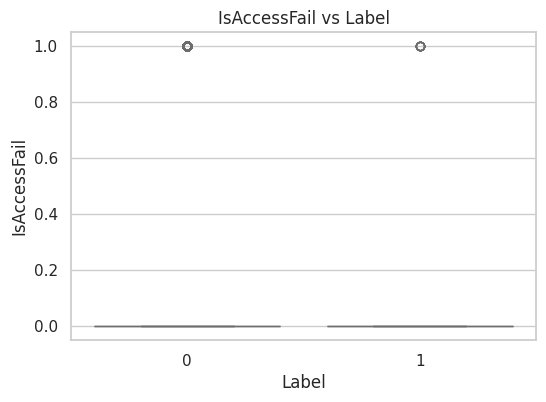

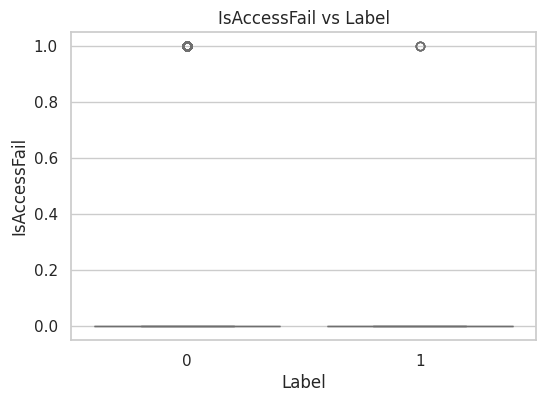

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Label', y='IsAccessFail', data=df_labeled_cv, color="salmon")
plt.title('IsAccessFail vs Label')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Label', y='IsAccessFail', data=df_labeled_test, color="skyblue")
plt.title('IsAccessFail vs Label')
plt.show()


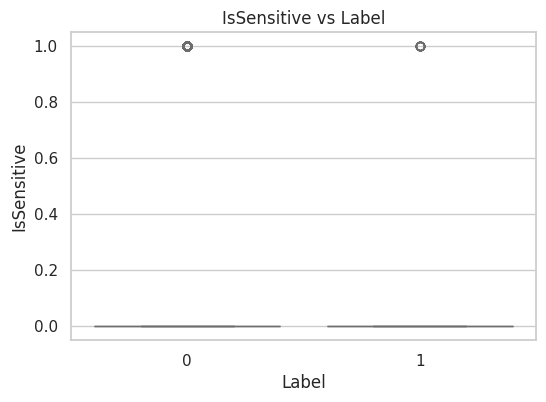

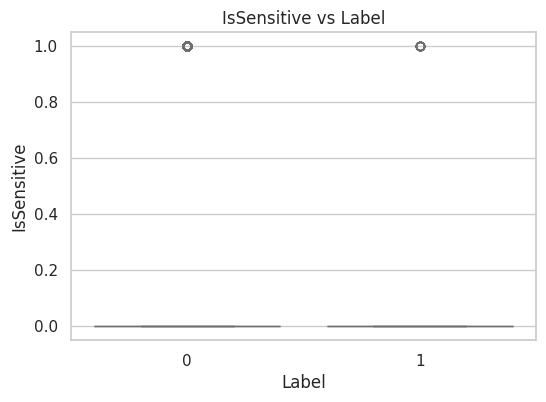

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Label', y='IsSensitive', data=df_labeled_cv, color="salmon")
plt.title('IsSensitive vs Label')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Label', y='IsSensitive', data=df_labeled_test, color="skyblue")
plt.title('IsSensitive vs Label')
plt.show()


In [1]:
import requests
import base64
from getpass import getpass

# 🔐 GitHub bilgileri
username = "sabisay"
token = getpass("GitHub Personal Access Token: ")
repo = "sabisay/AnomalyDetectionOnLogDatas"
branch = "main"

# 📄 Dosya yolları
local_file_path = "/content/drive/MyDrive/Colab Notebooks/Anomaly_Detection_OnLogDatas_2025/Preprocessing_Manually.ipynb"
github_file_path = "Preprocessing_Manually.ipynb"  # sadece repo içindeki isim!

# 💬 Commit mesajı
commit_message = "📘 Notebook güncellendi - Colab üzerinden"

# 🔽 Colab'daki dosya içeriğini oku
try:
    with open(local_file_path, "rb") as f:
        content = base64.b64encode(f.read()).decode()
except FileNotFoundError:
    raise Exception(f"{local_file_path} bulunamadı. Lütfen önce notebooku kaydet.")

# 🌐 GitHub API endpoint
url = f"https://api.github.com/repos/{repo}/contents/{github_file_path}"

# 🔐 Header bilgileri
headers = {
    "Authorization": f"token {token}",
    "Content-Type": "application/json"
}

# 📥 GitHub'da dosya var mı, kontrol et
res = requests.get(url, headers=headers)
if res.status_code == 200:
    sha = res.json()["sha"]
    print("📄 Dosya zaten mevcut, üstüne yazılacak.")
else:
    sha = None
    print("🆕 Dosya bulunamadı, yeni olarak yüklenecek.")

# 🚀 PUT isteği
data = {
    "message": commit_message,
    "content": content,
    "branch": branch,
}
if sha:
    data["sha"] = sha

upload_res = requests.put(url, headers=headers, json=data)

# ✅ Durum
if upload_res.status_code in [200, 201]:
    print("✅ Başarıyla GitHub'a yüklendi!")
else:
    print(f"❌ Hata: Status code {upload_res.status_code}, {upload_res.text}")


GitHub Personal Access Token: ··········


Exception: /content/drive/MyDrive/Colab Notebooks/Anomaly_Detection_OnLogDatas_2025/Preprocessing_Manually.ipynb bulunamadı. Lütfen önce notebooku kaydet.